In [1]:
import pandas as pd
def results_to_csv(y_test,dataname):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1. 
    df.to_csv(dataname+'submission.csv', index_label='Id')

# example of gradient checking: affine transformation

In [2]:
# gradient checking: compare the analytical gradient with the numerical gradient
# taking the affine layer as an example
from gradient_check import eval_numerical_gradient_array
import numpy as np
from tqdm import tqdm_notebook
from layers import *
N = 2
D = 3
M = 4
x = np.random.normal(size=(N, D))
w = np.random.normal(size=(D, M))
b = np.random.normal(size=(M, ))
dout = np.random.normal(size=(N, M))

# do a forward pass first
out, cache = affine_forward(x, w, b)
# check grad f/grad w, the [0] below gets the output out of the (output, cache) original output
f=lambda w: affine_forward(x, w, b)[0]
# compute the analytical gradient you wrote, [1] get the dw out of the (dx, dw, db) original output
grad = affine_backward(dout, cache)[1]
# compute the numerical gradient using the provided utility function
ngrad = eval_numerical_gradient_array(f, w, dout)
print(grad)
print(ngrad)
# they should be similar enough within some small error tolerance

[[ 2.64528394 -2.96322162 -0.76223478  1.62866452]
 [ 1.15500095 -1.53884306 -0.24904242  1.28048743]
 [-4.53968039  4.51152205  1.50427081 -1.46168856]]
[[ 2.64528394 -2.96322162 -0.76223478  1.62866452]
 [ 1.15500095 -1.53884306 -0.24904242  1.28048743]
 [-4.53968039  4.51152205  1.50427081 -1.46168856]]


# example of gradient checking: ReLU

In [19]:
N = 2
D = 3
M = 4
x = np.random.normal(size=(N, D))
w = np.random.normal(size=(D, M))
b = np.random.normal(size=(M, ))
dout = np.random.normal(size=(N, D))

out, cache = relu_forward(x)
grad = relu_backward(dout, cache)
ngrad = eval_numerical_gradient_array(lambda x: relu_forward(x)[0], x, dout)
print(grad)
print(ngrad)

[[ 0.6075281   0.         -0.0567495 ]
 [ 0.00940507 -0.20690946  0.        ]]
[[ 0.6075281   0.         -0.0567495 ]
 [ 0.00940507 -0.20690946  0.        ]]


# example of gradient checking: Softmax Loss

In [21]:
N = 2
D = 3
M = 4
x = np.random.normal(size=(N, D))
w = np.random.normal(size=(D, M))
b = np.random.normal(size=(M, ))
dout = np.random.normal(size=(N, D))

num_classes, num_inputs = 2,4
x = 0.001 * np.random.normal(size=(num_inputs, num_classes))
y = np.random.randint(num_classes, size=num_inputs)

ngrad = eval_numerical_gradient_array(lambda x: softmax_loss(x, y)[0], x, 1)
loss, grad = softmax_loss(x, y)
print(grad)
print(ngrad)

[[-0.12494204  0.12494204]
 [-0.12512408  0.12512408]
 [ 0.12497339 -0.12497339]
 [-0.12487521  0.12487521]]
[[-0.12494204  0.12494204]
 [-0.12512408  0.12512408]
 [ 0.12497339 -0.12497339]
 [-0.12487521  0.12487521]]


# example of training a network

In [41]:
# Load the dataset
import scipy.io
import numpy as np
data =   scipy.io.loadmat("mnist_data.mat")
X = data['training_data']
y = data['training_labels'].ravel()
X_test = data['test_data']

# Split the data into a training set and validation set.
num_train = X.shape[0]
indices = np.array(range(num_train))
np.random.shuffle(indices)
train_indices, val_indices = indices[0:60000], indices[50000:]
X_train, X_val = X[train_indices], X[val_indices]
y_train, y_val = y[train_indices], y[val_indices]

from solver import Solver
from classifiers.fc_net import FullyConnectedNet

In [42]:
data = {
      'X_train': X_train,
      'y_train': y_train,
      'X_val': X_val,
      'y_val': y_val}

In [43]:
# TODO: fill out the hyperparamets
hyperparams = {'lr_decay': 0.95,
               'num_epochs': 25,
               'batch_size': 2,
               'learning_rate': 0.0001,
               'weight_scale': 0.1
              }

# TODO: fill out the number of units in your hidden layers
hidden_dim = [100]  # this should be a list of units for each hiddent layer

model = FullyConnectedNet(input_dim=784,
                          hidden_dim=hidden_dim,
                          weight_scale=hyperparams['weight_scale'])

solver = Solver(model, data,
                update_rule='sgd',
                optim_config={
                  'learning_rate': hyperparams['learning_rate'],
                },
                lr_decay=hyperparams['lr_decay'],
                num_epochs=hyperparams['num_epochs'], 
                batch_size=hyperparams['batch_size'],
                print_every=10000)
solver.train()
solver.best_val_acc

(Iteration 1 / 750000) loss: 258.498597
(Epoch 0 / 25) train acc: 0.130000; val_acc: 0.125100
(Iteration 10001 / 750000) loss: 0.039245
(Iteration 20001 / 750000) loss: 0.008236
(Epoch 1 / 25) train acc: 0.923000; val_acc: 0.918000
(Iteration 30001 / 750000) loss: 0.736279
(Iteration 40001 / 750000) loss: 0.025894
(Iteration 50001 / 750000) loss: 0.065341
(Epoch 2 / 25) train acc: 0.934000; val_acc: 0.941400
(Iteration 60001 / 750000) loss: 0.211746
(Iteration 70001 / 750000) loss: 0.003600
(Iteration 80001 / 750000) loss: 0.056277
(Epoch 3 / 25) train acc: 0.954000; val_acc: 0.947200
(Iteration 90001 / 750000) loss: 1.394405
(Iteration 100001 / 750000) loss: 0.020511
(Iteration 110001 / 750000) loss: 0.541860
(Epoch 4 / 25) train acc: 0.960000; val_acc: 0.950300
(Iteration 120001 / 750000) loss: 0.030058
(Iteration 130001 / 750000) loss: 0.012533
(Iteration 140001 / 750000) loss: 0.213835
(Epoch 5 / 25) train acc: 0.962000; val_acc: 0.959300
(Iteration 150001 / 750000) loss: 0.111341


0.9623

In [6]:
def train_model(paras):
    hyperparams = {'lr_decay': paras[1],
               'num_epochs': paras[2],
               'batch_size': paras[3],
               'learning_rate': paras[4],
               'weight_scale':paras[5]
              }
    hidden_dim = paras[0]
    
    model = FullyConnectedNet(input_dim=784,
                              hidden_dim=hidden_dim,
                              weight_scale=hyperparams['weight_scale'])
    solver = Solver(model, data,
                    update_rule='sgd',
                    optim_config={
                      'learning_rate': hyperparams['learning_rate'],
                    },
                    lr_decay=hyperparams['lr_decay'],
                    num_epochs=hyperparams['num_epochs'], 
                    batch_size=hyperparams['batch_size'],
                    verbose=False
                    #print_every=100
                   )
    
    solver.train()
    return solver,model

## 1.2 Two-layer Network

In [44]:
import itertools
best_val = 0.0
best_model = None
best_para = None
best_solver = None

lr_decay = [0.95]
num_epochs = [20]
batch_size = [2,4,8]
learning_rate = [0.0001]
weight_scale = [0.1]
hidden_dims = [[h] for h in [100,150,200]]


paras = [i for i in itertools.product\
(hidden_dims,lr_decay,num_epochs,batch_size,learning_rate,weight_scale)]
total = str(len(paras))

for para in tqdm_notebook(paras):
    solver,model = train_model(para)
    if solver.best_val_acc > best_val:
        best_val = solver.best_val_acc
        best_model = model
        best_solver = solver
        best_para = para

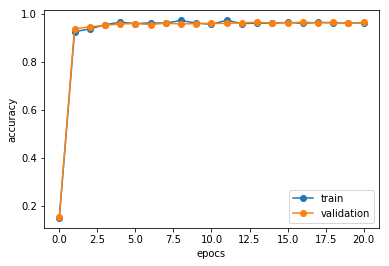

hyperparameters of the best model: ([200], 0.95, 20, 4, 0.0001, 0.1)
Validation accuracy of the best model: 0.965


In [45]:
from matplotlib import pyplot as plt
plt.plot(best_solver.train_acc_history, '-o', label="train")
plt.plot(best_solver.val_acc_history, '-o', label="validation")
plt.xlabel("epocs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print("hyperparameters of the best model: "+str(best_para));
print("Validation accuracy of the best model:",\
      best_solver.best_val_acc)

In [46]:
y_test_pred = np.argmax(best_model.loss(X_test), axis=1)

In [47]:
results_to_csv(y_test_pred,"MNIST")

## 1.3  Multi-layer Network

In [22]:
best_val = 0.0
best_model = None
best_para = None
best_solver = None

lr_decay = [0.95]
num_epochs = [20]
batch_size = [4,8]
learning_rate = [0.0001]
weight_scale = [0.1]
hidden_dims = [[200]*i for i in range(1,5)]

prog = 1
paras = [i for i in itertools.product\
(hidden_dims,lr_decay,num_epochs,batch_size,learning_rate,weight_scale)]
total = str(len(paras))

for para in tqdm_notebook(paras):
    solver,model = train_model(para)
    avg_val = np.mean(solver.val_acc_history)
    if avg_val > best_val:
        best_val = avg_val
        best_model = model
        best_solver = solver
        best_para = para
    # print("\rfinished training model # "+str(prog)+"/"+total,end="")
    prog += 1

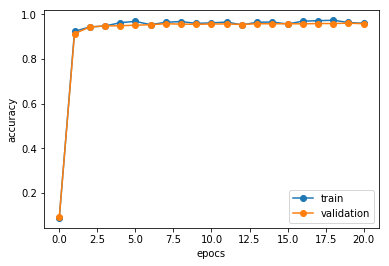

hyperparameters of the best model: ([200], 0.95, 20, 4, 0.0001, 0.1)
Validation accuracy of the best model: 0.961


In [24]:
from matplotlib import pyplot as plt
plt.plot(best_solver.train_acc_history, '-o', label="train")
plt.plot(best_solver.val_acc_history, '-o', label="validation")
plt.xlabel("epocs")
plt.ylabel("accuracy")
plt.legend()
plt.show()
print("hyperparameters of the best model: "+str(best_para));
print("Validation accuracy of the best model:",\
      best_solver.best_val_acc)

In [ ]:
y_test_pred = np.argmax(best_model.loss(X_test), axis=1)
results_to_csv(y_test_pred,"MNIST")